Kaggle Bike Sharing Dataset

In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Hands on Linear Regression 

Independent Variables [Input Features] : ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humudity', 'windspeed', 'year', 'month', 'day', 'dayofweek']
Dependent Variable [Target feature]: ['Count']

Objective: You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [34]:
columns = ['count','season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humudity', 'windspeed',
           'year', 'month', 'day', 'dayofweek']

In [35]:
# Read the csv files and parse thedatetime column as datetime
# If the datetime coulm is not parsed to be datetime, then it remains as an object

df_train = pd.read_csv('train.csv', parse_dates=['datetime'])
df_test = pd.read_csv('test.csv', parse_dates=['datetime'] )

In [36]:
df_train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [37]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [38]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [39]:
# We need to covert datetime to numeric values for training
# Therefore we need to extrat day, month & year as numeric features into separate columns

def add_features(df):
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['dayofweek'] = df['datetime'].dt.dayofweek

In [40]:
add_features(df_train)
add_features(df_test)

In [41]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5


In [42]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3


In [43]:
# Define the correlation of all the variables with respect to count
# If count column is not selected then correclation is defined for each column with respect of each column
# Which is not what w are looking for.
# In this case we are only looking for the how the dependent variable is realted to indepenent variables. 
df_train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
year          0.260403
month         0.166862
day           0.019826
dayofweek    -0.002283
Name: count, dtype: float64

In [44]:
# Groupby month to see how the monthly rental count looks like 
group_month = df_train.groupby(['month'])

In [45]:
average_by_month = group_month['count'].mean()

In [46]:
average_by_month.head()

month
1     90.366516
2    110.003330
3    148.169811
4    184.160616
5    219.459430
Name: count, dtype: float64

Text(0.5,1,'Rental count by Month')

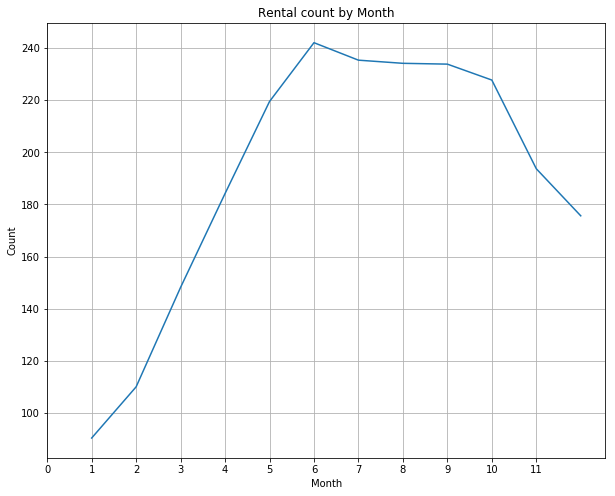

In [47]:
# Lets visualise how the average monthly rental counts look like
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(average_by_month.index, average_by_month)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(np.arange(12))
plt.grid(True)
plt.title('Rental count by Month')

In [48]:
# Lets count the average number of rentals for each year
group_year_month = df_train.groupby(['year', 'month'])

In [49]:
average_year_month = group_year_month['count'].mean()

Text(0.5,1,'Rental Count by Year, Month')

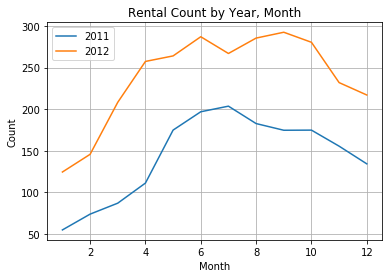

In [52]:
for year in average_year_month.index.levels[0]:
   #print(year)
    plt.plot(average_year_month[year].index, average_year_month[year], label=year)
    
plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Rental Count by Year, Month')

Text(0,0.5,'Count')

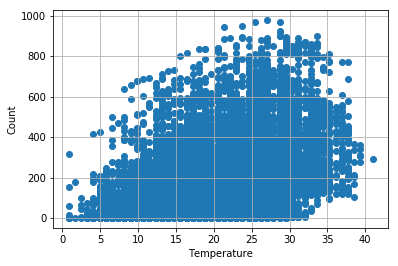

In [54]:
# lets plot and see how count is influenced by the temprature
plt.scatter(x=df_train.temp, y=df_train['count'], label='Temperature')
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('Count')

Text(0,0.5,'Count')

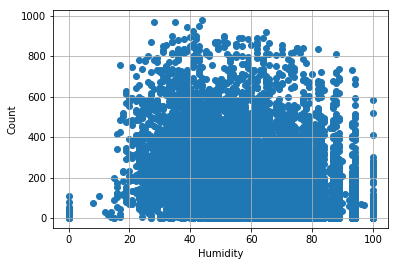

In [55]:
# lets plot and see how humidity is influenced by the temprature
plt.scatter(x=df_train.humidity, y=df_train['count'], label='Humidity')
plt.grid(True)
plt.xlabel('Humidity')
plt.ylabel('Count')

In [56]:
# The plots for Temperature and Humidity are very random and do not establish any clear realtion to Count. 

In [58]:
# Save all the training data as a bikesharing_all_data.csv
# We will further split this data into 70-30 for training as validation data sets. 
# And we will use the test.csv dataset provided by kaggle, 
# as a separate test data once the model has  been trained and validated.

df_train.to_csv('bikesharing_all_data.csv', index=False)

In [60]:
# Split this dataset inot training and validation dataset.
np.random.seed(5)
l = list(df_train.index)
np.random.shuffle(l)
df_train = df_train.iloc[l]

In [61]:
rows = df_train.shape[0]
train = int(0.7 * rows)
valida = int(0.3 * rows)

In [62]:
rows, train, valida

(10886, 7620, 3265)

In [63]:
# Write training dataset
df_train[:train].to_csv('bikesharing_train.csv', index=False)

In [64]:
# Write validation dataset
df_train[:valida].to_csv('bikesharing_valida.csv', index=False)

In [65]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3


In [66]:
df_test.to_csv('test_data.csv', index=False)